>>

### Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Deeplearning_2023S/project
%pwd
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Deeplearning_2023S/project
machine_label.pkl  machine_pts.pkl


In [38]:
# Import modules
import tensorflow as tf
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers, losses, callbacks
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
import pickle

In [6]:
with open('machine_pts.pkl', 'rb') as f:
    machine_pts = pickle.load(f)

with open('machine_label.pkl', 'rb') as f:
    machine_label = pickle.load(f)

In [7]:
# convert indies label to one-hot label
machine_one_hot_label = np.zeros((machine_label.size, machine_label.max() + 1))
machine_one_hot_label[np.arange(machine_label.size), machine_label] = 1

In [8]:
print(machine_pts.shape, machine_one_hot_label.shape)
x_train = machine_pts
y_train = machine_one_hot_label

(4215, 16, 48) (4215, 8)


In [14]:
# Define plot() function to observe model
def plot(history):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열의 subplot을 생성

    acc = history.history['acc'] 
    val_acc = history.history['val_acc'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    ax1.plot(epochs, acc, 'bo', label='Training acc') 
    ax1.plot(epochs, val_acc, 'b', label='Validation acc') 
    ax1.set_title('Training and validation accuracy') 
    ax1.legend()

    # plt.figure()

    ax2.plot(epochs, loss, 'bo', label='Training loss') 
    ax2.plot(epochs, val_loss, 'b', label='Validation loss') 
    ax2.set_title('Training and validation loss') 
    ax2.legend()

    plt.tight_layout()
    plt.show()

<br />

>>
### Using timeseries_dataset_from_array

In [ ]:
# dataset = tf.keras.utils.timeseries_dataset_from_array(
#     data=machine_pts, 
#     targets=machine_one_hot_label, 
#     sequence_length=16,
#     batch_size=32,
#     shuffle=False)

input_dataset = tf.keras.utils.timeseries_dataset_from_array(machine_pts, None, sequence_length=16, batch_size=128, shuffle=False)

In [ ]:
input_shape = (16,48)
output_shape = 8

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(16, input_shape=input_shape, return_sequences=False))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5), loss=losses.categorical_crossentropy, metrics=['acc'])
model.summary()

history = model.fit_generator(input_dataset, steps_per_epoch=100, epochs=50, validation_data=machine_one_hot_label)

<br />

>>
### LSTM(16)

In [20]:
callbacks_list = [callbacks.EarlyStopping(monitor='acc', 
                                          patience=5),
                  callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                4160      
                                                                 
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
Total params: 87,304
Trainable params: 87,304
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
106/106 [==============================] 

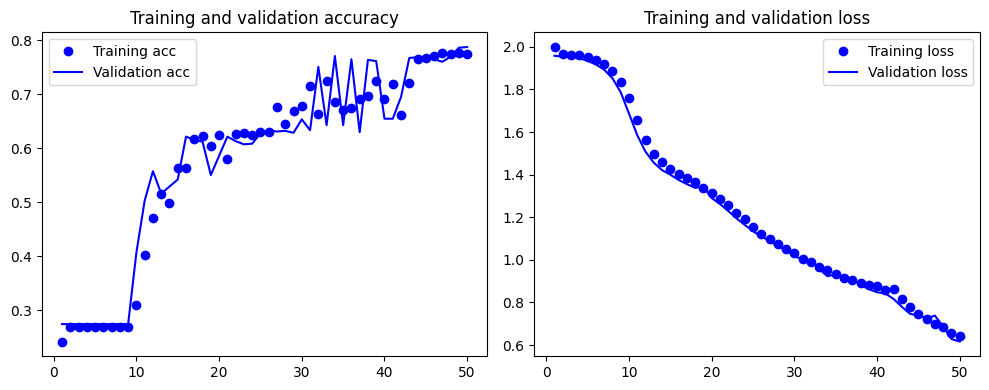

In [19]:
input_shape = (16,48)
output_shape = 8

K.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(16, input_shape=input_shape, return_sequences=False))
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=['acc'],
    callbacks=callbacks_list)

model.summary()

history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2)
plot(history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                4160      
                                                                 
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
Total params: 87,304
Trainable params: 87,304
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
106/106 [==============================] 

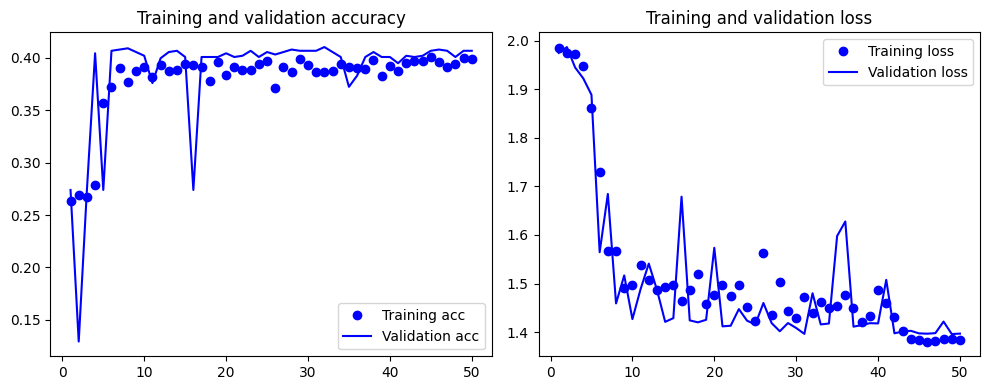

In [28]:
input_shape = (16,48)
output_shape = 8

K.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(16, input_shape=input_shape, return_sequences=False))
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))

callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='LSTM16_RMSProp.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]

model.compile(
    optimizer=optimizers.RMSprop(), 
    loss=losses.categorical_crossentropy, 
    metrics=['acc'])

model.summary()

history = model.fit(
    x_train, 
    y_train, 
    epochs=50, 
    validation_split=0.2,
    callbacks=callbacks_list)

plot(history)

<br />

>>
### LSTM(32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                10368     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
Total params: 10,632
Trainable params: 10,632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
106/106 [==============================] - 8s 57ms/step - loss: 193.6807 - acc: 0.0477 - val_loss: 185.0982 - val_acc: 0.0510 - lr: 1.0000e-04
Epoch 2/50
106/106 [==============================] - 6s 52ms/step - loss: 147.8668 - acc: 0.0469 - val_loss: 143.5636 - val_acc: 0.0356 - lr: 1.0000e-04
Epoch 3/50
106/106 [==============================] - 6s 58ms/step - loss: 115.6418 - acc: 0.0469 - val_loss: 102.8209 - val_acc: 0.0463 - l

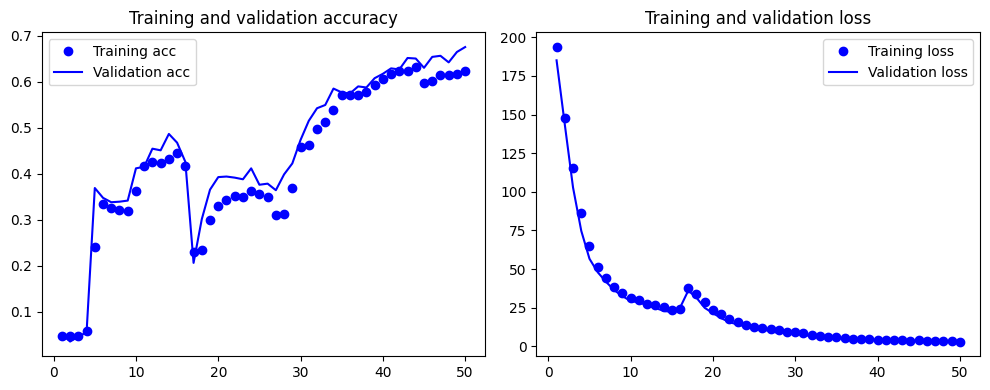

In [42]:
input_shape = (16,48)
output_shape = 8

K.clear_session()
model = tf.keras.Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=input_shape))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))

callbacks_list = [callbacks.ModelCheckpoint(filepath='LSTM32_Adam.h5', monitor='val_loss', save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss=losses.categorical_crossentropy, metrics=['acc'])

model.summary()

history = model.fit(
    x_train, 
    y_train, 
    epochs=50, 
    validation_split=0.2,
    callbacks=callbacks_list)

plot(history)